# Generative Models

## Discriminative Models

**Discriminative models** are typically used for **classification** in machine learning. They learn how to **distinguish between classes** $Y$ given a set of **features** $X$:

$$
X \to Y
$$

In other words, they model a **probability** $P$ of a class $Y$ given a set of features $X$:

$$
P(Y|X)
$$

## Generative Models

**Generative models** try to learn how to make a **realistic representation** of some class: 

$$
\xi, Y \to X
$$

They take some **random noise** input $\xi$ (greek letter 'xi') and sometimes a **class** $Y$. From these inputs, it's goal is to generate a set of **features** $X$ that look realistic. The noise is to ensure that what's generated isn't actually the same each time.

More generally, generative models try to capture the **probability distribution** of the **features** $X$ given a **class** $Y$:

$$
P(X|Y)
$$

If you're only generating **one class**, it's just the probability over all the features $X$:

$$
P(X)
$$

### Variational Autoencoders - VAE

There are many types of generative models, the most popular ones are **variational autoencoders** (VAE) and **generative adversarial networks** (GAN).

VAEs contain two neural networks, an **encoder** and a **decoder**. They learn first by feeding in realistic images into the encoder to find a good way of representing that image in a **latent space**. A point in the latent space can be represented by a **vector**.

The VAE takes this latent representation, or a point close to it, and put it through the **decoder**. The goal of the decoder is to reconstruct the realistic image that the encoder saw before. 

After training of the decoder, we remove the encoder and we can pick random points in the latent space, and the decoder will have learned to produce an image of a dog. 

The **variational** part actually inject **some noise** into this whole model and training process. Instead of having the encoder encode the image into a single point in that latent space, the encoder actually encodes the image onto a whole **distribution** and then samples a point on that distribution to feed into the decoder to then produce a realistic image.

A good distribution over the latent space is important for VAEs. 

### Generative Adversarial Networks - GAN

The **generator** takes in some random noise input. As an output it generate an image over time. The **generator** is in some sense similar to the **decoder in a VAE**. What's different is that there's no guiding encoder that determines what the noise vector should look like, that's input into the generator. 

Instead, there's a discriminator looking at **fake** and **real** images trying to figure out which ones are real and which ones are fake. Over time, each model tries to one up each other. These models compete against each other which is why they're called **adversarial**.

The two models compete with each other and reach a point where realistic examples are produced by the generator.

## BCE Cost Function

The **Binary Cross Entropy** function (BCE) is used for training GANs. It's useful for these models, because it is designed for classification tasks, where there are **two categories** like real and fake.

The BCE calculates as

$$
\begin{align}
J(\theta) &= -\frac{1}{m} \sum_{i=1}^m \big(y_i \, log(\hat{y}_i) + (1 - y_i) \, log(1 - \hat{y}_i)\big) \\
&= -\frac{1}{m} \sum_{i=1}^m \big(y_i \, log(h(x_i, \theta)) + (1 - y_i \, log(1 - h(x_i, \theta))\big)
\end{align}
$$

with the number of examples $m$ in the entire **batch**, the **prediction** $\hat{y}$ of a particular batch, the **label** $y$ of a particular batch, the **features** $x$ and the **parameters** $\theta$

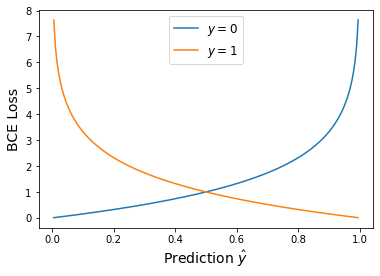

In [1]:
import numpy as np
import matplotlib.pyplot as plt

y_hat = np.linspace(0, 1, 200)[1:-1]
bce = lambda y, y_hat: - y * np.log2(y_hat) - (1 - y) * np.log2(1 - y_hat)

plt.xlabel(r'Prediction $\hat{y}$', fontsize=14)
plt.ylabel('BCE Loss', fontsize=14)
plt.plot(y_hat, bce(0, y_hat), label=r'$y = 0$')
plt.plot(y_hat, bce(1, y_hat), label=r'$y = 1$')
plt.legend(fontsize='large');

The BCE function has two parts, one relevant for each **class** label. Therefore the **batch** can contain labels $y=0$ and $y=1$.

It is close to **zero**, when label $y$ and prediction $\hat{y}$ are **similar**. It is **infinity**, when the label $y$ and prediction $\hat{y}$ are **different**.

## Train the GAN

The **discriminator** wants the fake examples to seem **as fake as possible** ($y = 0$) by comparing with real examples ($y = 1$). 

The **generator** wants fake examples to seem **as real as possible** ($y = 1$). That is, it wants to fool the discriminator. 

So as you **alternate** their **training**, only one model is trained at a time, while the other one is held constant.

The two models should always be at a **similar "skill"-level**. Supposed you have a **superior discriminator** which is 100% sure on detecting a fake example, he can't tell the **generator** on how to improve.

![GAN Architecture](images/gan_architecture.svg)

### Train the Discriminator

The discriminator is simply a **binary classifier** with two classes: **real** and **fake**. Given an input $X$, the discriminator will calculate the probabilities $p(Y=real|X)$ and $p(Y=fake|X)$ and classify $X$.

#### Model Architecture

The noise $\xi$ generates fake examples $\hat{X}$ (features). Then both, the fake examples $\hat{X}$ and the real examples $X$ are passed into the **discriminator** without telling the discriminator which ones are real and which ones are fake.

Then the **discriminator** makes **predictions** $\hat{Y}$ of which ones are real and which ones are fake. Or more specifically a **probability of score** of how fake and how real each of these images are. 

After that, the predictions are **compared** using **BCE loss** with the desired labels for fake and real. This **updates** the parameters $\theta_d$ of the **discriminator**.

### Train the Generator

The **generator** generates a few **fake examples** $\hat{X}$ using noise $\xi$ as input. These are passed into the **discriminator**. But in this case the **discriminator** only sees fake examples from the **generator** which pretends these are real, it doesn't see the real examples at all.

Then the discriminator makes predictions $\hat{y}$ of how real or fake these are and after that the predictions are **compared** using the **BCE loss** with all the labels equal to **real**, because the generator is trying to get these fake images to be equal to real ($y = 1$) as closely as possible. After computing the cost, the gradient is then propagated backwards and the parameters $\theta_g$ of the **generator** are updated.

### Noise vector

The **noise vector** $z$ is making sure the images generated from the same class $y$ don't look all the same. 

It is generated randomly, usually by sampling random numbers either from an **uniform distribution** $z \sim \mathcal{U}(I)$, or from the **normal distribution** $z \sim \mathcal{N}(0, I)$ with the identity matrix $I$.




### Truncation

Truncation samples $z$ from a truncated normal distribution where the tails are cut off at different **truncation values** $t$.

Tuning the truncation tunes **fidelity** (German: Treue, Genauigkeit) and **diversity** (German: Vielfalt). Having a lot of fidelity is not always the goal from a model that's supposed to model the realm of all possible human faces.

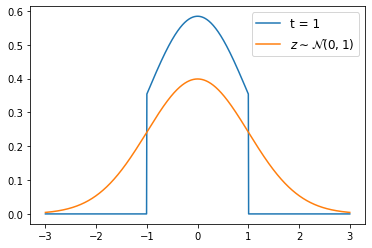

In [2]:
from scipy.stats import truncnorm, norm
import matplotlib.pyplot as plt

trunc = 1
mean = 0
std = 1

x = np.linspace(-3, 3, 1000)

plt.plot(x, truncnorm.pdf(x, -trunc/std, trunc/std, loc=mean, scale=std), label=f't = {trunc}')
plt.plot(x, norm.pdf(x, loc=mean, scale=std), label=r'$z \sim \mathcal{N}(0, 1)$')
plt.legend(fontsize=12);

A truncation value of **1** means a **low truncation** (**high diversity**) and a truncation value of **0** means **all truncation** except for the mean (**high quality/fidelity**). 

A lower value increases fidelity and decreases diversity, and vice versa.

# Example of an MNIST GAN with PyTorch

In [3]:
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

### Generator

This generator is a neural network with **fully connected** hidden layers.

In [4]:
class Generator(nn.Module):

    def __init__(self, z_dim=10, im_dim=784):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, im_dim),
            nn.Sigmoid()
        )

    def forward(self, noise):
        return self.generator(noise)


### Discriminator

This discriminator is a neural network with **fully connected** hidden layers.

In [5]:
class Discriminator(nn.Module):

    def __init__(self, im_dim=784):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(im_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1)
        )

    def forward(self, image):
        return self.discriminator(image)


### Training

In [6]:
batch_size = 128
lr = 0.00001
z_dim = 64

dataloader = DataLoader(MNIST('.', download=True, transform=transforms.ToTensor()), batch_size=batch_size, shuffle=True)
n_train_set = len(dataloader)

generator = Generator(z_dim)
generator_optim = torch.optim.Adam(generator.parameters(), lr=lr)

discriminator = Discriminator()
discriminator_optim = torch.optim.Adam(discriminator.parameters(), lr=lr)

criterion = nn.BCEWithLogitsLoss()

In [ ]:
n_epochs = 1000
mean_g_loss, mean_d_loss = 0, 0

for epoch in range(1, n_epochs + 1):
    for real, _ in dataloader:
        cur_batch_size = len(real)
        real = real.view(cur_batch_size, -1)

        discriminator_optim.zero_grad()
        fake_noise = torch.randn(cur_batch_size, z_dim)
        fake = generator(fake_noise)
        fake_pred = discriminator(fake.detach())
        fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
        real_pred = discriminator(real)
        real_loss = criterion(real_pred, torch.ones_like(real_pred))
        d_loss = (fake_loss + real_loss) / 2
        d_loss.backward(retain_graph=True)
        discriminator_optim.step()
        
        generator_optim.zero_grad()
        fake_noise = torch.randn(cur_batch_size, z_dim)
        fake = generator(fake_noise)
        fake_pred = discriminator(fake)
        g_loss = criterion(fake_pred, torch.ones_like(fake_pred))
        g_loss.backward()
        generator_optim.step()

        mean_d_loss += d_loss.item() / n_train_set
        mean_g_loss += g_loss.item() / n_train_set
    
    print(f'Epoch {epoch}: Generator loss: {mean_g_loss}, Discriminator loss: {mean_d_loss}')
    mean_g_loss = 0
    mean_d_loss = 0
